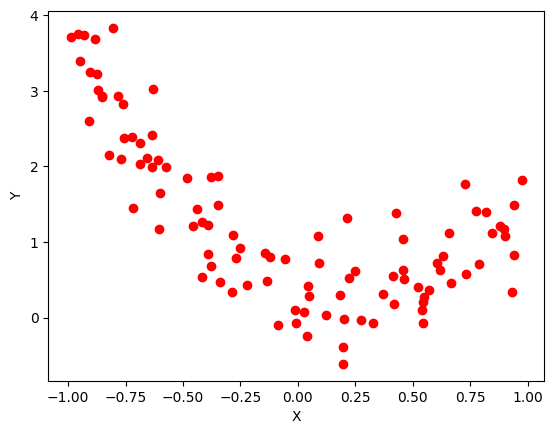

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Number of data points
num_points = 100

# Polynomial function parameters
coefficients = [2, -1, 0.5]  # Coefficients of the polynomial equation: 2x^2 - x + 0.5

# Generate random X values between -1 and 1
random_x = np.random.uniform(low=-1, high=1, size=num_points)

# Generate corresponding Y values using the polynomial equation and add random noise
random_y = np.polyval(coefficients, random_x) + np.random.normal(loc=0, scale=0.5, size=num_points)

# Create scatter plot
plt.scatter(random_x, random_y,c="r")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [26]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

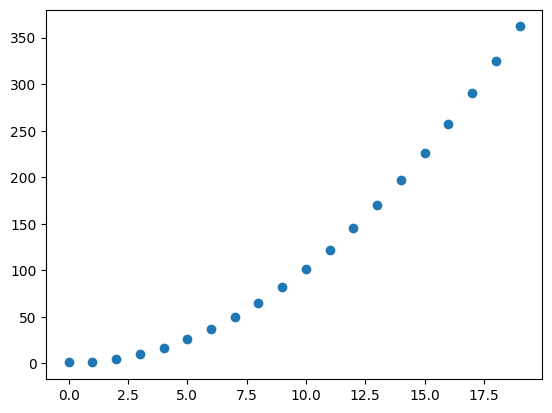

In [27]:
plt.scatter(X,y)

In [4]:
class LinearRegression:
  def __init__(self):
    self.theta = np.zeros((2,1)) # theta[0] -b & theta[1] - w
    self.line_eqn = [] #hold the diff values of thetas.

  def fit(self,X,y,alpha,epochs,**kwargs):
      """
      Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
      with learning rate of alpha
      
      return theta and the list of the cost of theta during each  iteration
      """
      
      m=len(y)
      J_history=[]

      for i in range(epochs):
          # print(self.theta)
          self.line_eqn.append(np.copy(self.theta))
          predictions = X.dot(self.theta)
          error = np.dot(X.transpose(),(predictions -y))
          descent=alpha * 1/m * error
          self.theta-=descent
          J_history.append(self.computeCost(X,y,self.theta))

      return self.theta, J_history

  def computeCost(self,X,y,theta):
      """
      Take in a numpy array X,y, theta and generate the cost function of using theta(w) as parameter in a linear regression model
      """
      m=len(y)
      predictions=X.dot(theta)  #y = wx+b
      # print(predictions) 
      square_err=(predictions - y)**2   #f(x(i))-y(i)
      # print(np.isfinite(square_err))
      # print(square_err) 
      cost = 1/(2*m) * np.sum(square_err)
      return cost

In [47]:
lr = LinearRegression()

In [28]:
x = np.append(np.ones((len(X),1)),X[:,0].reshape(len(X),1),axis=1)

In [31]:
y = y.reshape(-1,1)

In [48]:
theta,loss = lr.fit(x,y,1e-2,1000)

In [49]:
theta

array([[-52.08341025],
       [ 18.69806954]])

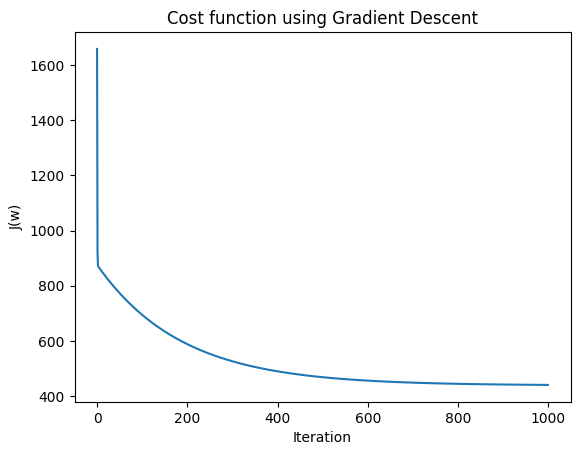

In [50]:
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("J(w)")
plt.title("Cost function using Gradient Descent")
plt.show()

In [51]:
x_test = [np.array([x_val[1]]) for x_val in x]
y_pred =[y*lr.theta[1]+lr.theta[0] for y in x_test]

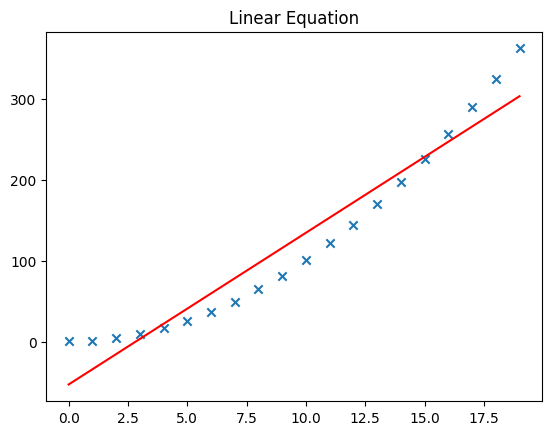

In [70]:
plt.scatter(x[:,1],y,marker='x')
plt.plot(x_test,y_pred,color="r")
plt.title("Linear Equation")
plt.show()

In [56]:
# create target data
x1 = np.arange(0, 20, 1)
y1 = 1 + x1**2

# Engineer features 
X = x1**2      

print(x1)
print(y1)
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [53]:
model = LinearRegression()

Text(0.5, 1.0, 'Added x**2 feature')

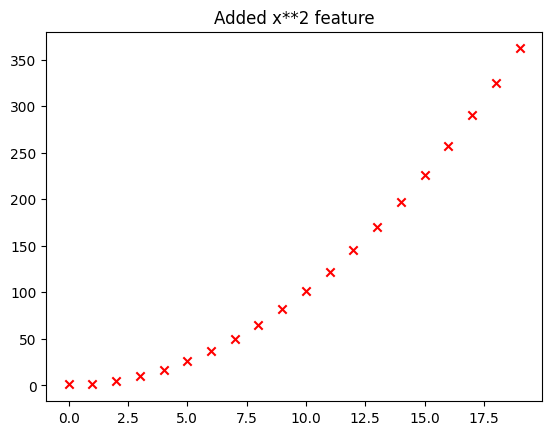

In [59]:
plt.scatter(x1, y1, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")

In [62]:
X = X.reshape(-1,1)

In [63]:
X = np.append(np.ones((len(X),1)),X[:,0].reshape(len(X),1),axis=1)

In [64]:
param,hist = model.fit(X,y,1e-5,10000)

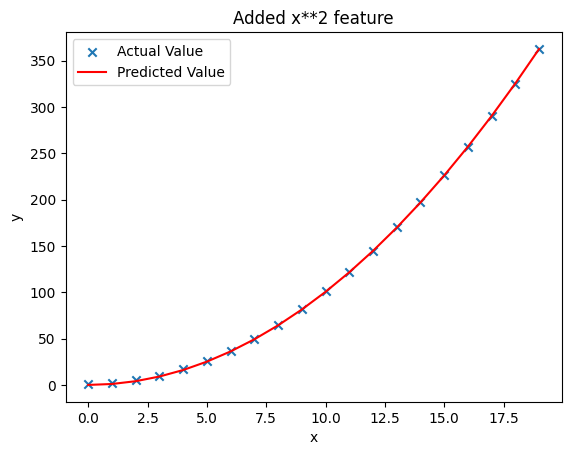

In [69]:
plt.scatter(x1, y1, marker='x', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x1, np.dot(X,param), label="Predicted Value",c="r"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()